In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RESULT_PATH = 'result'

In [3]:
# 把字体文件迁移到 matplotlib 字体目录下
import matplotlib
print(matplotlib.get_data_path())
def make_ttf_exists(name):
    new_path = os.path.join(matplotlib.get_data_path(), 'fonts', 'ttf', name)
    if not os.path.exists(new_path) or not os.path.getsize(new_path):
        with open(new_path, 'wb') as w, open(name, 'rb') as r:
            w.write(r.read())
for name in ['times.ttf', 'SimSun.ttf']:
    make_ttf_exists(name)

/usr/local/lib/python3.8/dist-packages/matplotlib/mpl-data


In [4]:
import matplotlib.font_manager as fm
# 清理并重建字体缓存
fm._load_fontmanager()
# 查看可用字体
available_fonts = sorted([f.name for f in fm.fontManager.ttflist])
print(available_fonts)

['DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Serif Display', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'STIXSizeTwoSym', 'SimSun', 'Times New Roman', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


In [5]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

44 [0, 8, 18, 28, 31, 38, 45, 52, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246, 256, 263, 270, 277, 284, 293, 301, 308, 315, 322, 317]
SARSA 0 925 951.71
70 [2, 9, 19, 29, 36, 43, 50, 57, 64, 71, 65, 70, 69, 68, 67, 66, 73, 80, 87, 86, 91, 90, 97, 104, 105, 100, 101, 112, 119, 126, 125, 127, 122, 123, 130, 137, 138, 139, 140, 147, 154, 149, 156, 163, 174, 172, 173, 170, 182, 192, 202, 212, 222, 232, 238, 237, 236, 243, 253, 260, 267, 274, 281, 289, 298, 305, 312, 311, 318, 317]
Q-Learning 0 391 922.8
62 [0, 1, 0, 1, 0, 1, 0, 1, 0, 8, 18, 28, 31, 38, 45, 52, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246, 256, 255, 257, 255, 257, 255, 257, 255, 254, 253, 252, 259, 266, 273, 280, 288, 297, 304, 311, 318, 317]
DDQN 0 144 807.25
50 [2, 9, 19, 29, 36, 43, 50, 57, 64, 71, 78, 85, 92, 99, 106, 113, 109, 116, 120, 119, 126, 133, 140, 147, 154, 161, 168

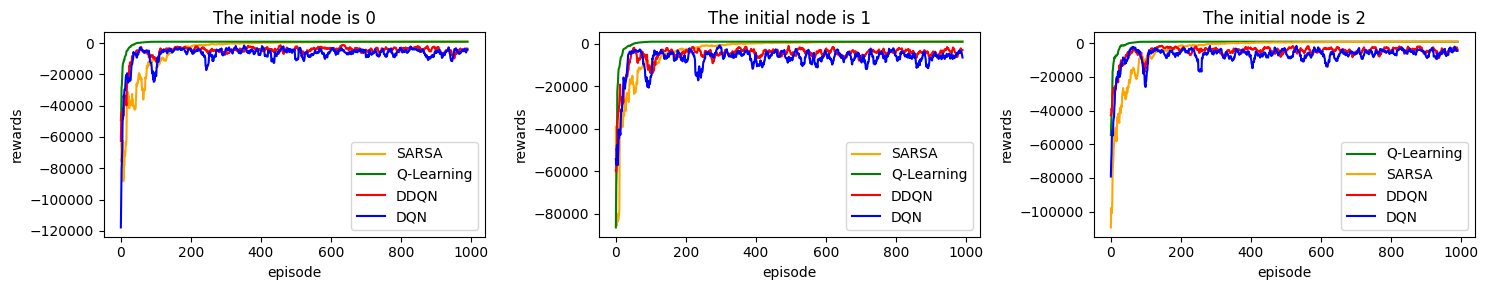

In [6]:
cmap = {
    'DQN': 'b',
    'DDQN': 'r',
    'SARSA': 'orange',
    'Q-Learning': 'g'
}

figure, ax_list = plt.subplots(1, 3, figsize=(15, 3))

appoint_node = 317

for name in os.listdir(RESULT_PATH):
    try:
        agent, start_node, end_node = name.split('.')[0].split('_')
        # if batch != appointed_batch:
        #     continue
    except:
        # if not appointed_batch:
        #     agent, start_node = name.split('.')[0].split('_')
        # else:
            continue
    # if agent not in ['SARSA', 'Q-Learning']: continue
    start_node, end_node = map(int, (start_node, end_node))
    if end_node != appoint_node: continue
    with open(os.path.join(RESULT_PATH, name)) as f:
        data = json.load(f)
        print(len(data['best_path']), data['best_path'])
        print(agent, start_node, data['rewards'].index(max(data['rewards'])), round(max(data['rewards']), 2))
        for row, ylabel in enumerate(['rewards']):
            ax = ax_list[start_node]
            ax.plot(moving_average(data[ylabel], 10), color=cmap[agent], label=agent)
            ax.set_xlabel('episode')
            ax.set_ylabel(ylabel)
            ax.set_title(f'The initial node is {start_node}')
            ax.legend()
figure.tight_layout()

62 [0, 1, 0, 1, 0, 1, 0, 1, 0, 8, 18, 28, 31, 38, 45, 52, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246, 256, 255, 257, 255, 257, 255, 257, 255, 254, 253, 252, 259, 266, 273, 280, 288, 297, 304, 311, 318, 317]
DDQN 0 317 144 807.25
44 [0, 8, 18, 28, 31, 38, 45, 52, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246, 256, 263, 270, 277, 284, 293, 301, 308, 315, 322, 317]
DDQN 1 317 625 951.71
60 [0, 1, 0, 1, 9, 19, 29, 36, 43, 50, 57, 64, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246, 256, 263, 270, 277, 284, 293, 301, 308, 315, 308, 301, 308, 315, 322, 315, 322, 315, 322, 315, 322, 315, 322, 317]
DDQN 2 317 570 849.28
47 [0, 1, 9, 19, 29, 36, 43, 50, 44, 45, 52, 59, 66, 73, 80, 87, 94, 101, 112, 119, 126, 133, 140, 147, 154, 161, 168, 170, 182, 192, 202, 212, 222, 232, 238, 246,

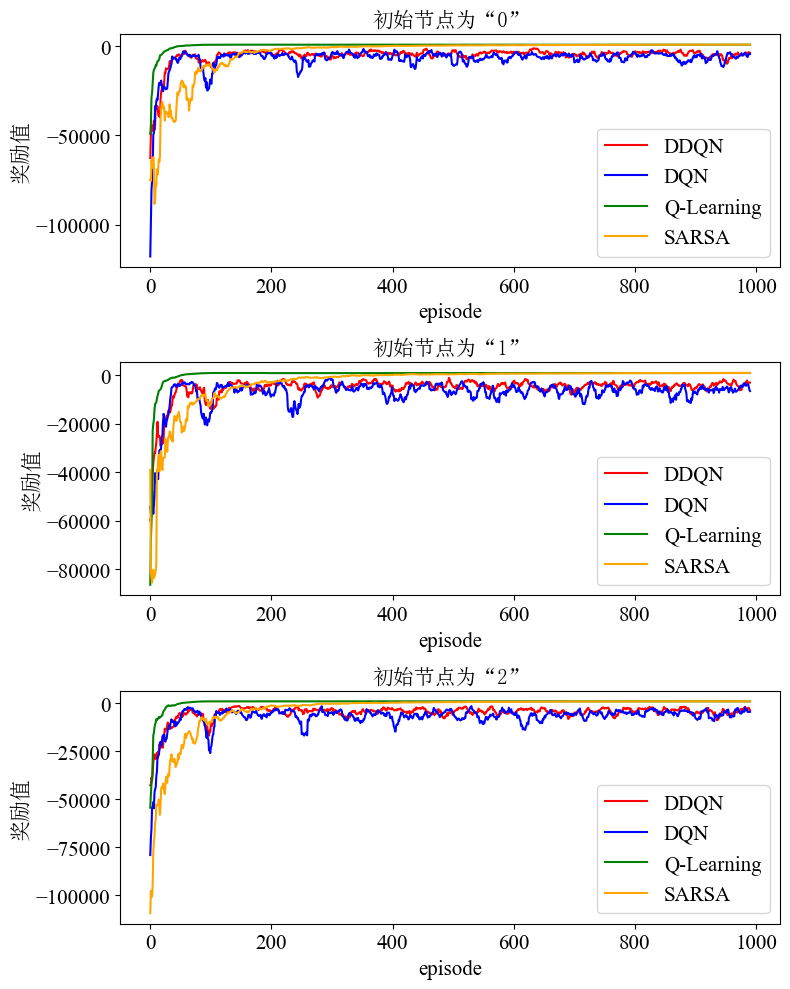

In [9]:
cmap = {
    'DQN': 'b',
    'DDQN': 'r',
    'SARSA': 'orange',
    'Q-Learning': 'g'
}
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 全局设置Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.family'] = 'sans-serif'
figure, ax_list = plt.subplots(3, 1, figsize=(8, 10))

for name in sorted(os.listdir(RESULT_PATH)):
    try:
        agent, start_node, end_node = name.split('.')[0].split('_')
    except:
            continue
    start_node, end_node = map(int, [start_node, end_node])
    if end_node != appoint_node: continue
    with open(os.path.join(RESULT_PATH, name)) as f:
        data = json.load(f)
        print(len(data['best_path']), data['best_path'])
        print(agent, start_node, end_node, data['rewards'].index(max(data['rewards' ])), round(max(data['rewards']), 2))
        for row, ylabel in enumerate(['rewards']):
            ax = ax_list[start_node]
            ax.plot(moving_average(data[ylabel], 10), color=cmap[agent], label=agent)
            ax.set_xlabel('episode',size = 15)
            ax.set_ylabel('奖励值', fontproperties='SimSun',size = 15)
            ax.set_title(f'初始节点为“{start_node}”', fontproperties='SimSun',size = 15)
            #ax.yticks(fontproperties = 'Times New Roman', size = 20, rotation=0)
            #ax.xticks(fontproperties = 'Times New Roman', size = 20, rotation=0)
            ax.tick_params(axis='y', labelsize=15, labelrotation=0, labelcolor='black')
            ax.tick_params(axis='x', labelsize=15, labelrotation=0, labelcolor='black')
            #plt.legend(prop={'family':'Times New Roman','size':15},loc="lower right") 
            # 添加中文标题
            # ax.text(0.5, 1.04, f'初始节点为 ', ha='center', va='center', fontsize=13, fontproperties='SimSun', transform=ax.transAxes)
            # 添加英文标题
            # ax.text(0.6, 1.04, str(start_node), ha='center', va='center', fontsize=13, transform=ax.transAxes)
            ax.legend(prop={'family':'Times New Roman','size':15},loc="lower right")
figure.tight_layout()